In [9]:
import numpy as np
from numpy import genfromtxt

# Question 1
A = genfromtxt('hw_csv_file/hw_2_A.csv', delimiter=',')
B = genfromtxt('hw_csv_file/hw_2_B.csv', delimiter=',')
C = genfromtxt('hw_csv_file/hw_2_C.csv', delimiter=',')
D = genfromtxt('hw_csv_file/hw_2_D.csv', delimiter=',')
E = genfromtxt('hw_csv_file/hw_2_E.csv', delimiter=',')

x = genfromtxt('hw_csv_file/hw_2_x.csv', delimiter=',')
x = np.reshape(x, (len(x), 1))

y = genfromtxt('hw_csv_file/hw_2_y.csv', delimiter=',')
y = np.reshape(y, (len(y), 1))

z = genfromtxt('hw_csv_file/hw_2_z.csv', delimiter=',')
z = np.reshape(z, (len(z), 1))


In [10]:
# 1
ans = np.max(np.trace(np.inner(A, A)))
print(f'1): {ans}')

1): 292.05


In [11]:
# 2
ans = np.min(np.trace(np.inner(A, B)))
print(f'2): {ans}')

2): 10.449999999999996


In [12]:
# 3
ans = np.sum(np.trace(np.inner(C, D)))
print(f'3): {ans}')

2): -3.49


In [13]:
# 4
ans = np.average((C+D).dot(x))
print(f'4): {ans}')

4): -0.47000000000000014


In [15]:
# 5
ans = np.max(np.trace(np.inner(C.T, D.T))* x)
print(f'5): {ans}')

5): 0.349


In [16]:
# 6
ans = np.min(x.dot(z.T))
print(f'6): {ans}')

6): -3.7199999999999998


In [23]:
# 7
ans = x.dot(z.T)
print(f'7): {ans}')

7): [[-3.72  0.12  0.24]
 [-1.86  0.06  0.12]
 [ 0.   -0.   -0.  ]
 [ 0.31 -0.01 -0.02]
 [-3.72  0.12  0.24]]


In [24]:
# 8
ans = np.sum(A+B-10)
print(f'8): {ans}')

8): -2987.2000000000003


In [25]:
# 9
ans = np.average(A.T.dot(B))
print(f'9): {ans}')

9): -2.774444444444445


In [26]:
# 10
ans = E.T.dot(C.T.dot(D.dot(x)))
print(f'10): {ans}')

10): [[ 8.8684]
 [-4.502 ]
 [-3.0041]
 [-5.5886]]


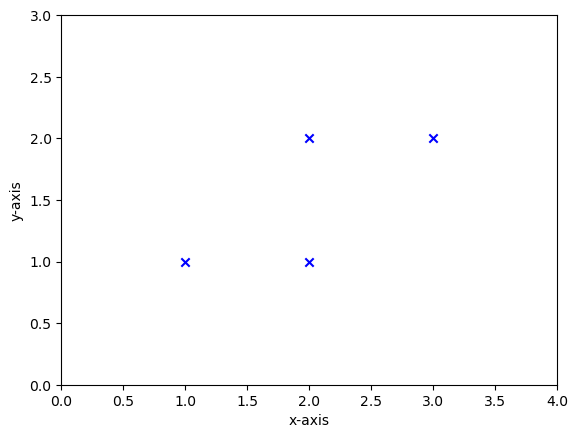

In [ ]:
# Question 2
import numpy as np
import matplotlib.pyplot as plt

x_points = [1, 2, 2, 3]
y_points = [1, 1, 2, 2]

plt.scatter(x_points, y_points, color='blue', marker='x')
plt.xlim([0, 4])
plt.ylim([0, 3])

plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

In [6]:
# function and derivative
n = len(x_points)

def phi(x):
    return np.array([[x, 1]]).T

def f(w, n):
    return 1/n * sum((w.T.dot(phi(x_points[i]))-y_points[i])**2 for i in range(n))

def f_prime(w, n):
    sigma = sum((w.T.dot(phi(x_points[i]))-y_points[i])*(phi(x_points[i])) for i in range(n))
    return (2/n) * sigma

In [16]:
# Gradient descent
eta = 0.002

f_value_list = []
w = np.array([[2], [2]])

for i in range(1000):
    w = w - eta * f_prime(w, n)
    f_value_list.append(f(w, n).item())

print('Best w = \n', w)

a = w[0].item()  # value for w1
b = w[1].item()  # value for w2

Best w = 
 [[0.28702254]
 [0.96935296]]


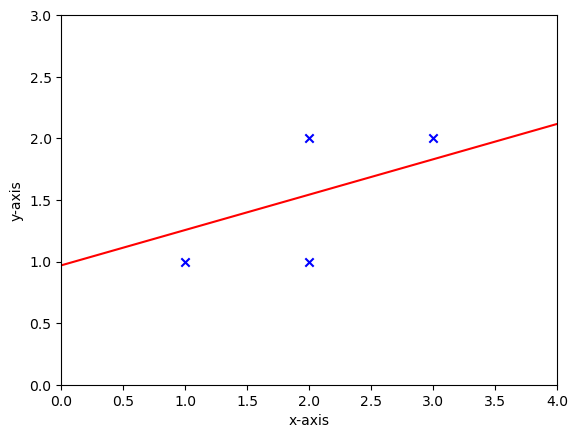

In [15]:
x_line = np.linspace(0, 6, 100)
y_line = a * x_line + b  # y = ax+b

# Plot points 
plt.scatter(x_points, y_points, color='blue', marker='x')
plt.xlim([0, 4])
plt.ylim([0, 3])

# plot regressopm
plt.plot(x_line, y_line, linestyle='-', color='red')

plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

In [30]:
# Question 3
x_points = [1, 2, 1.5, 3]
y_points = [1, 1, 0, 2]

n = len(x_points)

def phi(x):
    return np.array([[x**2, x, 1]]).T

def f(w, n):
    return 1/n * sum((w.T.dot(phi(x_points[i]))-y_points[i])**2 for i in range(n))

def f_prime(w, n):
    sigma = sum((w.T.dot(phi(x_points[i]))-y_points[i])*(phi(x_points[i])) for i in range(n))
    return (2/n) * sigma

# Gradient descent
eta = 0.02

f_value_list = []
w = np.array([[1], [1], [1]])

for i in range(1000):
    w = w - eta * f_prime(w, n)
    f_value_list.append(f(w, n).item())

print('Best w = \n', w)
a = w[0].item()
b = w[1].item()
c = w[2].item()

Best w = 
 [[ 0.31695242]
 [-0.54023596]
 [ 0.71344606]]


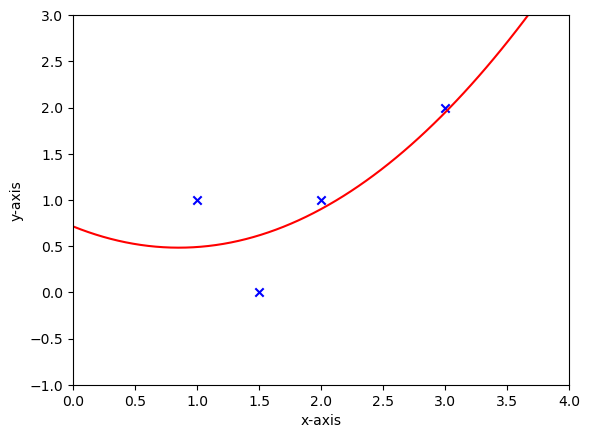

In [31]:
x_line = np.linspace(0, 6, 100)
y_line = a*x_line**2 + b*x_line + c  # y = ax+b

# Plot points 
plt.scatter(x_points, y_points, color='blue', marker='x')
plt.xlim([min(x_points)-1, max(x_points)+1])
plt.ylim([min(y_points)-1, max(y_points)+1])

# plot regressopm
plt.plot(x_line, y_line, linestyle='-', color='red')

plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

In [10]:
# Question 5
# 1
import autograd.numpy as np
from autograd import grad 
n = 3

y = np.random.random((n, 1))

def f(x):
    return np.dot(np.transpose(y), x)

def f_prime(x):
    return y

grad_foo = grad(f)

for i in range(3):
    x = np.random.default_rng().random(3)
    print(f'input: {x}')
    print(f'Numpy ᐁf: {grad_foo(x)} \n Theoretical ᐁf: {np.transpose(f_prime(x))} \n')  # Turn into rows to make it easier to read

input: [0.17251002 0.93515845 0.93609683]
Numpy ᐁf: [0.91206197 0.22687825 0.38276943] 
 Hand-Written ᐁf: [[0.91206197 0.22687825 0.38276943]] 

input: [0.90488774 0.30892387 0.6938505 ]
Numpy ᐁf: [0.91206197 0.22687825 0.38276943] 
 Hand-Written ᐁf: [[0.91206197 0.22687825 0.38276943]] 

input: [0.99838107 0.6547034  0.84139076]
Numpy ᐁf: [0.91206197 0.22687825 0.38276943] 
 Hand-Written ᐁf: [[0.91206197 0.22687825 0.38276943]] 



In [19]:
# 2
n = 2

A = np.random.random((n, n))

def f(x, A):
    return np.dot(np.dot(np.transpose(x), A), x)

def f_prime(x, A):
    return np.dot(np.transpose(A)+A, x)

grad_foo = grad(f)

for i in range(3):
    x = np.random.default_rng().random(n)
    print(f'input: {x}')
    print(f'Numpy ᐁf: {grad_foo(x, A)} \n Theoretical ᐁf: {np.transpose(f_prime(x, A))} \n')  # Turn into rows to make it easier to read

input: [0.00674246 0.97503256]
Numpy ᐁf: [0.40440009 1.73072346] 
 Theoretical ᐁf: [0.40440009 1.73072346] 

input: [0.89305667 0.7755499 ]
Numpy ᐁf: [1.45102996 1.73699951] 
 Theoretical ᐁf: [1.45102996 1.73699951] 

input: [0.35973733 0.52829074]
Numpy ᐁf: [0.67213878 1.08229319] 
 Theoretical ᐁf: [0.67213878 1.08229319] 



In [25]:
# 3
n = 2

A = np.random.random((n, n))

def f(x, A):
    return np.trace(np.dot(np.dot(np.transpose(x), A), x))

def f_prime(x, A):
    return np.dot((np.transpose(A)+A), x)

grad_foo = grad(f)

for i in range(3):
    x = np.random.default_rng().random((n, 1))
    # Turn into all vectors rows to make output easier to read
    print(f'input: {np.transpose(x)}')
    print(f'Numpy ᐁf: {np.transpose(grad_foo(x, A))} \n Hand-Written ᐁf: {np.transpose(f_prime(x, A))} \n')  

input: [[0.80645275 0.87711276]]
Numpy ᐁf: [[0.21120164 1.59671804]] 
 Hand-Written ᐁf: [[0.21120164 1.59671804]] 

input: [[0.9641612  0.13087862]]
Numpy ᐁf: [[0.04167946 0.43209515]] 
 Hand-Written ᐁf: [[0.04167946 0.43209515]] 

input: [[0.40507237 0.52812823]]
Numpy ᐁf: [[0.12619915 0.94292343]] 
 Hand-Written ᐁf: [[0.12619915 0.94292343]] 



In [26]:
# 4
n = 2

x = np.random.random((n, 1))

def f(w, x):
    z = np.dot(np.transpose(w), x)

    if z > 0:
        return z
    else:
        return 0 

def f_prime(w, x):
    z = np.dot(np.transpose(w), x)

    if z > 0:
        return 1 * x 
    else: 
        return 0 * x

grad_foo = grad(f)

for i in range(3):
    w = np.random.default_rng().random((n, 1))
    # Turn into all vectors rows to make output easier to read
    print(f'input: {np.transpose(w)}')
    print(f'Numpy ᐁf: {np.transpose(grad_foo(w, x))} \n Hand-Written ᐁf: {np.transpose(f_prime(w, x))} \n') 

input: [[0.60605118 0.73918889]]
Numpy ᐁf: [[0.75855028 0.9090237 ]] 
 Hand-Written ᐁf: [[0.75855028 0.9090237 ]] 

input: [[0.40582601 0.83258359]]
Numpy ᐁf: [[0.75855028 0.9090237 ]] 
 Hand-Written ᐁf: [[0.75855028 0.9090237 ]] 

input: [[0.56982709 0.53671439]]
Numpy ᐁf: [[0.75855028 0.9090237 ]] 
 Hand-Written ᐁf: [[0.75855028 0.9090237 ]] 



In [32]:
# 5
n = 3

x_arrays = [np.array([[1], [1]]), np.array([[3], [2]]), np.array([[5], [2]])]
y_list = [1, 4, 7]

def f(w):
    return 1/n * sum((np.dot(np.transpose(w), x_arrays[i]) - y_list[i])**2 for i in range(n))

def f_prime(w):
    return 2/n * sum((np.dot(np.transpose(w), x_arrays[i]) - y_list[i])* x_arrays[i] for i in range(n))

grad_foo = grad(f)

for i in range(3):
    w = np.random.default_rng().random((2, 1))
    # Turn into all vectors rows to make output easier to read
    print(f'input: {np.transpose(w)}')
    print(f'Numpy ᐁf: {np.transpose(grad_foo(w))} \n Hand-Written ᐁf: {np.transpose(f_prime(w))} \n') 

input: [[0.94538954 0.74790654]]
Numpy ᐁf: [[-1.46463648 -0.13147924]] 
 Hand-Written ᐁf: [[-1.46463648 -0.13147924]] 

input: [[0.42520415 0.79349232]]
Numpy ᐁf: [[-13.08565678  -5.753399  ]] 
 Hand-Written ᐁf: [[-13.08565678  -5.753399  ]] 

input: [[0.0786823  0.82074711]]
Numpy ᐁf: [[-20.86227909  -9.51711794]] 
 Hand-Written ᐁf: [[-20.86227909  -9.51711794]] 



In [36]:
# 6
n = 2

A = np.random.random((n, n))

def f(x, A):
    return np.exp(-np.trace(np.dot(np.dot(np.transpose(x), A), x)))

def f_prime(x, A):
    return np.exp(-np.trace(np.dot(np.dot(np.transpose(x), A), x))) * (-np.dot((np.transpose(A)+A), x))

grad_foo = grad(f)

for i in range(3):
    x = np.random.default_rng().random((n, 1))
    # Turn into all vectors rows to make output easier to read
    print(f'input: {np.transpose(x)}')
    print(f'Numpy ᐁf: {np.transpose(grad_foo(x, A))} \n Hand-Written ᐁf: {np.transpose(f_prime(x, A))} \n') 

input: [[0.30038613 0.74517938]]
Numpy ᐁf: [[-0.32067451 -0.36454354]] 
 Hand-Written ᐁf: [[-0.32067451 -0.36454354]] 

input: [[0.88123586 0.09548319]]
Numpy ᐁf: [[-0.37946248 -0.27550542]] 
 Hand-Written ᐁf: [[-0.37946248 -0.27550542]] 

input: [[0.32080669 0.59528649]]
Numpy ᐁf: [[-0.30508784 -0.33110157]] 
 Hand-Written ᐁf: [[-0.30508784 -0.33110157]] 



In [38]:
# 7
n = 2

A = np.random.random((n, n))

def f(x, A):
    return np.exp(-np.dot(np.dot(np.transpose(x), A), x))

def f_prime(x, A):
    return np.exp(-np.dot(np.dot(np.transpose(x), A), x)) * (-np.dot((np.transpose(A)+A), x))

grad_foo = grad(f)

for i in range(3):
    x = np.random.default_rng().random((n, 1))
    # Turn into all vectors rows to make output easier to read
    print(f'input: {np.transpose(x)}')
    print(f'Numpy ᐁf: {np.transpose(grad_foo(x, A))} \n Hand-Written ᐁf: {np.transpose(f_prime(x, A))} \n') 

input: [[0.49240942 0.54473836]]
Numpy ᐁf: [[-0.44907698 -0.47231559]] 
 Hand-Written ᐁf: [[-0.44907698 -0.47231559]] 

input: [[0.44185377 0.4689734 ]]
Numpy ᐁf: [[-0.426556  -0.4467444]] 
 Hand-Written ᐁf: [[-0.426556  -0.4467444]] 

input: [[0.89907529 0.81600349]]
Numpy ᐁf: [[-0.42098746 -0.43393522]] 
 Hand-Written ᐁf: [[-0.42098746 -0.43393522]] 



In [43]:
# 8

def f(z):
    return 1/(1+np.exp(-z))

def f_prime(z):
    return (np.exp(-z)/((1 + np.exp(-z))**2))

grad_foo = grad(f)

for i in range(3):
    z = np.random.randn()
    # Turn into all vectors rows to make output easier to read
    print(f'input: {z}')
    print(f'Numpy ᐁf: {grad_foo(z)} \n Hand-Written ᐁf: {f_prime(z)} \n') 

input: -0.08388693715889321
Numpy ᐁf: 0.24956070167654856 
 Hand-Written ᐁf: 0.24956070167654856 

input: 0.09040201912384196
Numpy ᐁf: 0.2494899121098976 
 Hand-Written ᐁf: 0.24948991210989757 

input: 1.0331268628683925
Numpy ᐁf: 0.19358346379557884 
 Hand-Written ᐁf: 0.1935834637955788 



In [46]:
# 9
n = 2

x = np.random.random((n, 1))

def f(w, x):
    return 1/(1+np.exp(-np.dot(np.transpose(w), x)))

def f_prime(w, x):
    return (np.dot(x, np.exp(-np.dot(np.transpose(w), x))))/((1+np.exp(-np.dot(np.transpose(w), x)))**2)

grad_foo = grad(f)

for i in range(3):
    w = np.random.default_rng().random((n, 1))
    # Turn into all vectors rows to make output easier to read
    print(f'input: {np.transpose(w)}')
    print(f'Numpy ᐁf: {np.transpose(grad_foo(w, x))} \n Hand-Written ᐁf: {np.transpose(f_prime(w, x))} \n') 

input: [[0.95901773 0.688328  ]]
Numpy ᐁf: [[0.03392145 0.07592235]] 
 Hand-Written ᐁf: [[0.03392145 0.07592235]] 

input: [[0.73869506 0.88355926]]
Numpy ᐁf: [[0.03373653 0.07550846]] 
 Hand-Written ᐁf: [[0.03373653 0.07550846]] 

input: [[0.149465   0.21499876]]
Numpy ᐁf: [[0.03490079 0.07811428]] 
 Hand-Written ᐁf: [[0.03490079 0.07811428]] 



In [53]:
# 10
n = 2

def f(x):
    return np.sum(np.abs(x))  #L1 norm is the same as sum of absolute values

def f_prime(x):
    return np.sign(x)

grad_foo = grad(f)

for i in range(3):
    x= np.random.randn(n,1)
    # Turn into all vectors rows to make output easier to read
    print(f'input: {np.transpose(x)}')
    print(f'Numpy ᐁf: {np.transpose(grad_foo(x))} \n Hand-Written ᐁf: {np.transpose(f_prime(x))} \n') 

input: [[0.43493212 0.95422547]]
Numpy ᐁf: [[1. 1.]] 
 Hand-Written ᐁf: [[1. 1.]] 

input: [[-0.78420838 -1.2465865 ]]
Numpy ᐁf: [[-1. -1.]] 
 Hand-Written ᐁf: [[-1. -1.]] 

input: [[-1.58764284  1.41825076]]
Numpy ᐁf: [[-1.  1.]] 
 Hand-Written ᐁf: [[-1.  1.]] 



In [57]:
# 11
n=2

def f(x): 
	return np.sqrt(sum(x**2))

def f_prime(x):
    return x/(np.sqrt(sum(x**2)))

grad_foo = grad(f)

for i in range(3):
    x= np.random.randn(n,1)
    # Turn into all vectors rows to make output easier to read
    print(f'input: {np.transpose(x)}')
    print(f'Numpy ᐁf: {np.transpose(grad_foo(x))} \n Hand-Written ᐁf: {np.transpose(f_prime(x))} \n') 

input: [[1.41468234 1.49041062]]
Numpy ᐁf: [[0.68844047 0.72529285]] 
 Hand-Written ᐁf: [[0.68844047 0.72529285]] 

input: [[-0.159417   -1.76849926]]
Numpy ᐁf: [[-0.08977851 -0.99596176]] 
 Hand-Written ᐁf: [[-0.08977851 -0.99596176]] 

input: [[ 0.65377909 -0.11736494]]
Numpy ᐁf: [[ 0.98426598 -0.17669319]] 
 Hand-Written ᐁf: [[ 0.98426598 -0.17669319]] 



In [65]:
# 13
n = 2
lambda_ = np.random.randn()

A = np.random.random((n, n))

def f(x): 
	return np.dot(np.dot(np.transpose(x), A), x) - lambda_ * (np.dot(np.transpose(x), x)-1)

def f_prime(x):
    return np.dot((np.transpose(A)+A), x) - 2 * lambda_ * x


grad_foo = grad(f)

for i in range(3):
    x = np.random.randn(n,1)
    # Turn into all vectors rows to make output easier to read
    print(f'input: {np.transpose(x)}')
    print(f'Numpy ᐁf: {np.transpose(grad_foo(x))} \n Hand-Written ᐁf: {np.transpose(f_prime(x))} \n') 

input: [[0.52420031 0.45113726]]
Numpy ᐁf: [[1.9666781  1.79743957]] 
 Hand-Written ᐁf: [[1.9666781  1.79743957]] 

input: [[0.85950209 0.36325494]]
Numpy ᐁf: [[2.78078036 1.96305405]] 
 Hand-Written ᐁf: [[2.78078036 1.96305405]] 

input: [[-1.36741682 -0.41964411]]
Numpy ᐁf: [[-4.2374367 -2.7093484]] 
 Hand-Written ᐁf: [[-4.2374367 -2.7093484]] 



In [73]:
# 14
sigma = np.random.randn()
x_values = [0, 2, 3, 1, 10]
n = len(x_values)


def f(u):
    return sum(np.log(1/np.sqrt(2*np.pi*sigma))- ((x_values[i] - u)**2)/(2*sigma**2) for i in range(n))

def f_prime(u):
    return (sum(x_values[i]-u for i in range(n)))*(1/sigma**2)

grad_foo = grad(f)

for i in range(3):
    u = np.random.randn()
    # Turn into all vectors rows to make output easier to read
    print(f'input: {u}')
    print(f'Numpy ᐁf: {grad_foo(u)} \n Hand-Written ᐁf: {f_prime(u)} \n') 

input: -0.07195700758201024
Numpy ᐁf: 3.0590341473045273 
 Hand-Written ᐁf: 3.059034147304527 

input: 0.10661454036629238
Numpy ᐁf: 2.89208315692016 
 Hand-Written ᐁf: 2.89208315692016 

input: -0.7105644900640019
Numpy ᐁf: 3.6560841975068223 
 Hand-Written ᐁf: 3.6560841975068215 



In [79]:
# 15
x_values = [3, 1, -1, 5, 8]
n = len(x_values)


def f(lambda_):
    return sum(np.log(lambda_) - lambda_*x_values[i] for i in range(n))

def f_prime(lambda_):
    return sum(((1/lambda_)-x_values[i]) for i in range(n))

grad_foo = grad(f)

for i in range(3):
    lambda_ = np.random.randn()
    # Turn into all vectors rows to make output easier to read
    print(f'input: {lambda_}')
    print(f'Numpy ᐁf: {grad_foo(lambda_)} \n Hand-Written ᐁf: {f_prime(lambda_)} \n') 

input: -0.9083993529779746
Numpy ᐁf: -21.504187099659053 
 Hand-Written ᐁf: -21.504187099659053 

input: 1.5615712572457368
Numpy ᐁf: -12.798096803588152 
 Hand-Written ᐁf: -12.798096803588148 

input: -0.6037676312796345
Numpy ᐁf: -24.281331659669995 
 Hand-Written ᐁf: -24.28133165967 



In [83]:
# 16
alpha_values = [0, 1, 1, 0, 1, 1, 0, 0, 0]
n = len(alpha_values)


def f(p):
    return sum((alpha_values[i]*np.log(p) + (1-alpha_values[i])*np.log(1-p)) for i in range(n))

def f_prime(p):
    return sum(((alpha_values[i]/p) - (1-alpha_values[i])/(1-p)) for i in range(n))

grad_foo = grad(f)

for i in range(3):
    p = np.random.randn()
    # Turn into all vectors rows to make output easier to read
    print(f'input: {p}')
    print(f'Numpy ᐁf: {grad_foo(p)} \n Hand-Written ᐁf: {f_prime(p)} \n') 

input: -0.6249698816989008
Numpy ᐁf: -9.47728853298199 
 Hand-Written ᐁf: -9.47728853298199 

input: -0.7488018866965893
Numpy ᐁf: -8.200967183001072 
 Hand-Written ᐁf: -8.200967183001072 

input: 1.6367169180041996
Numpy ᐁf: 10.296700147223728 
 Hand-Written ᐁf: 10.296700147223726 



In [86]:
sorted(np.random.randn(2, 1))[0]

array([-0.82718022])

In [107]:
# 17
n = 3

def f(x):
    a = x[0]
    b = x[1]
    return sum(np.log(1/(a-b)) for i in range(n))

def f_prime(a, b):
    return np.array([[n/(b-a)], [-n/(b-a)]])

grad_foo = grad(f)

for i in range(3):
    a, b = np.random.uniform(size=2)

    if a > b:
        a, b = b, a

    a = np.array([a], dtype=np.float64)
    b = np.array([b], dtype=np.float64)

    x = np.array([[a], [b]])

    # Turn into all vectors rows to make output easier to read
    print(f'a: {a} | b: {b}')
    print(f'Numpy ᐁf: {grad_foo(x)} \n Hand-Written ᐁf: {f_prime(a, b)} \n') 

a: [0.15192074] | b: [0.78124136]
Numpy ᐁf: [[[ 4.76704543]]

 [[-4.76704543]]] 
 Hand-Written ᐁf: [[[ 4.76704543]]

 [[-4.76704543]]] 

a: [0.75489596] | b: [0.81260578]
Numpy ᐁf: [[[ 51.98421272]]

 [[-51.98421272]]] 
 Hand-Written ᐁf: [[[ 51.98421272]]

 [[-51.98421272]]] 

a: [0.48771604] | b: [0.56418739]
Numpy ᐁf: [[[ 39.2303764]]

 [[-39.2303764]]] 
 Hand-Written ᐁf: [[[ 39.2303764]]

 [[-39.2303764]]] 

